<a href="https://colab.research.google.com/github/JuliaKoryukova/Machine-Learning/blob/main/02_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_Python_Matplotlib_Seaborn_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация на Python. Matplotlib. Seaborn. Plotly


In [ ]:
!pip install -q plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

!gdown 1kfwKDsUs9I3jaYxLQhbz8ofEIEHSGPBT
df = pd.read_csv('https://drive.google.com/uc?id=1kfwKDsUs9I3jaYxLQhbz8ofEIEHSGPBT')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Downloading...
From: https://drive.google.com/uc?id=1kfwKDsUs9I3jaYxLQhbz8ofEIEHSGPBT
To: /content/car_data.csv
100% 816k/816k [00:00<00:00, 91.8MB/s]


Для числовых признаков строю гистограммы с использованием Matplotlib


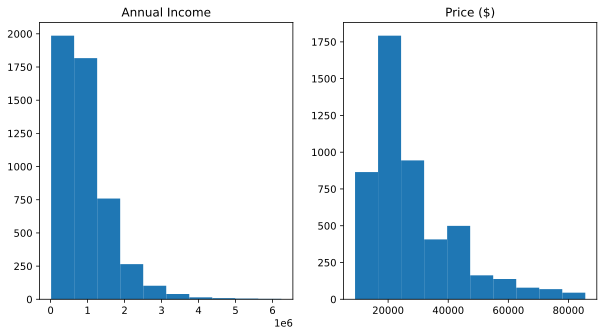

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.hist(df['Annual Income'])
plt.title('Annual Income')

plt.subplot(122)
plt.hist(df['Price ($)'])
plt.title('Price ($)')

plt.show()

Строю график типа box plot с горизонтальным размещением ящиков для визуализации зависимости стоимости автомобилей (Price ($)) от марки (Company)  с использованием Matplotlib

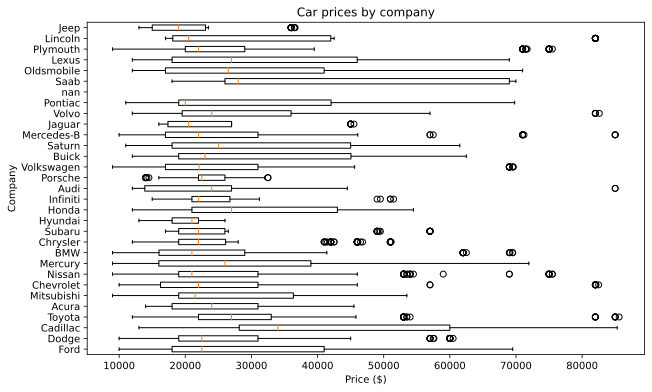

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Company'] == company]['Price ($)'] for company in df['Company'].unique()],
            vert=False,
            labels=df['Company'].unique())
plt.title('Car prices by company')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.show()

Строю Scatter plot для признаков Price ($) и Annual Income, отметив разными цветами тип коробки передач (Transmission)  с использованием Matplotlib


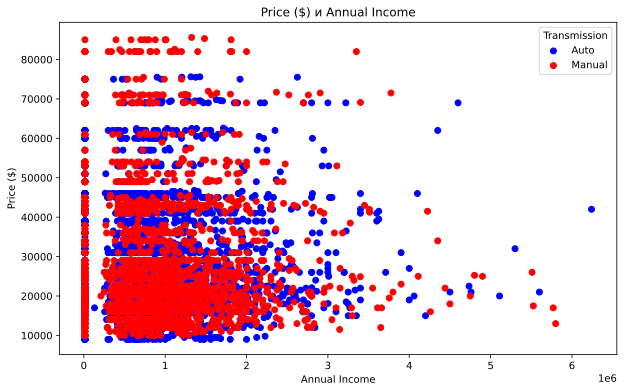

In [ ]:
plt.figure(figsize=(10, 6))
colors = {'Auto': 'blue', 'Manual': 'red'}
grouped = df.groupby('Transmission')

for transmission, group in grouped:
  plt.scatter(group['Annual Income'], group['Price ($)'], c=colors[transmission], label=transmission)

plt.title('Price ($) и Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.show()

Строю графики с использованием библиотеки Plotly.

In [ ]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Annual Income', 'Price ($)'))
fig.add_trace(go.Histogram(x=df['Annual Income'], name='Annual Income'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Price ($)'], name='Price ($)'), row=2, col=1)

fig.show()

1. График распределения годового дохода (Annual Income)

    Форма распределения: Гистограмма годового дохода показывает, как доходы распределены среди клиентов. Можно увидеть, есть ли пики, соответствующие определенным уровням дохода, и насколько широко разбросаны доходы.

    Центр и разброс: Мы можем определить средний уровень дохода и его вариативность. Например, если большинство значений сгруппированы в определенном диапазоне, это может указывать на средний доход большинства клиентов.

2. График цен на автомобили (Price ($)

    Форма распределения: Гистограмма цен на автомобили показывает, как распределены цены на автомобили среди клиентов. Мы можем увидеть, есть ли определенные ценовые категории, которые наиболее популярны.
    
    Центр и разброс: Определение среднего уровня цен на автомобили и их разброса. Если большинство значений сгруппированы в определенном ценовом диапазоне, это может указывать на предпочтительный диапазон цен для клиентов.

In [ ]:
fig = px.box(df, x='Dealer_Region', y='Price ($)', title='Цена в зависимости от региона продажи')
fig.update_layout(xaxis_title='Dealer_Region', yaxis_title='Price ($)')
fig.show()

С помощью этого графика можно узнать в каких регионах продаются более дорогие или дешевые автомобили.



---



Строю графики с использованием библиотеки Seaborn.

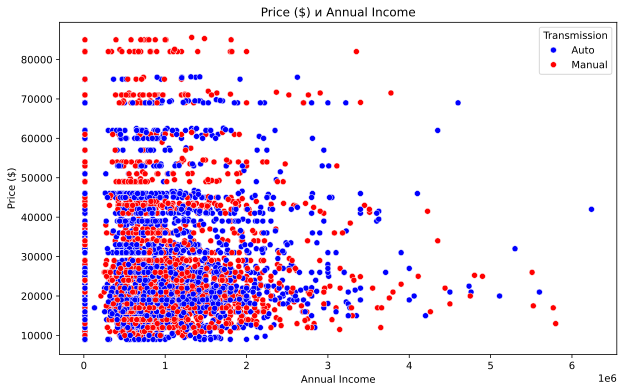

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Transmission', palette={'Auto': 'blue', 'Manual': 'red'})
plt.title('Price ($) и Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.show()

Созданный график с помощью Seaborn позволяет нам визуально оценить зависимость стоимости автомобилей от годового дохода клиентов, а также увидеть распределение автомобилей с различными типами коробок передач. Благодаря цветовой дифференциации можно легко сравнить группы автомобилей с автоматической и ручной коробками передач.

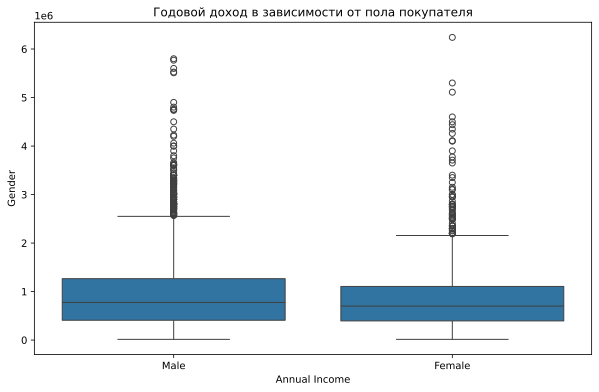

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Annual Income')
plt.title('Годовой доход в зависимости от пола покупателя')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.show()

Созданный график с помощью Seaborn позволяет нам визуально оценить как распределяется доход между мужчинами и женщинами.